In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

### Items


- "I went to the store yesterday." (correct)
- "I goed to the store yesterday." (incorrect)



- `I [went] to the store yesterday.`
- `I [goed] to the store yesterday.`



### Database


- `testings_testitem`, a table describing all items, including whether or not they were "active" (enabled) in the system as of the dump.
- `testings_completedtestitem`, a table containing all interactions between users and items. An interaction results in a correct answer, an incorrect answer, or a timeout .

### `testings_testitem`


In [3]:
# Show some rows from the testings_testitem table
pd.read_csv('/content/drive/MyDrive/data/testings_testitem_head.txt', encoding='utf-8', sep='\t', index_col='id').head()

,created,correct,incorrect,points,percent_correct,times_exposed,correct_responses,active,explanation,total_feedback,language_id,type_id,challenge_rating,svn_revision,rowhash,est_rating,search_key,explanation_text,hint,total_comments
id,,,,,,,,,,,,,,,,,,,,
1,2011-10-24 10:25:40,a fair lady,a fare lady,10,90.18,1354,1221,1,"Fair and ""fare"" are often confused. ""Fair"" mea...",0,1,1,2,107898,6759FBABBA97DCDC1D50743257AAA593,935,fair,"Fair and ""fare"" are often confused. ""Fair"" mea...",NaN,0
2,2011-10-24 10:25:40,a [beautiful old wooden] cottage,a [wooden old beautiful] cottage,10,87.51,1657,1450,1,"When more than one adjective is used, an opini...",0,1,1,3,107898,AD69D5988F6B5078FE2888CA86E4792D,1045,NaN,"When more than one adjective is used, an opini...",NaN,0
3,2011-10-24 10:25:40,worked here [for] five years,worked here [since] five years,10,85.42,1790,1529,1,"For and ""since"" are often confused. ""For"" refe...",1,1,1,2,107898,91BCA8E81FE1210AE0AF6F84CE30605A,1203,for,"For and ""since"" are often confused. ""For"" refe...",NaN,0
4,2011-10-24 10:25:40,itsy bitsy spider,tinsy bitsy spider,10,80.56,1528,1231,1,Itsy bitsy spider is the name of a popular Eng...,0,1,1,2,107898,974A1DACF4CB22C0BB31243E3F1E9318,1552,itsy bitsy,Itsy bitsy spider is the name of a popular Eng...,NaN,0
5,2011-10-24 10:25:40,bank teller,bank windower,10,87.20,1266,1104,1,"Of these two, only ""bank teller"" is correct En...",0,1,1,2,0,C257A2FB0F4D2F6F2ECED0550EEA1418,1298,teller,"Of these two, only ""bank teller"" is correct En...",NaN,0


### `testings_completedtestitem`


In [4]:
# Show some rows from the testings_completedtestitem table
pd.read_csv('/content/drive/MyDrive/data/testings_completedtestitem_head.txt', encoding='utf-8', sep='\t', index_col='id').head()

,created,item_id,test_id,user_id,completed,correct_response,points,timed_out,groupnum,rownum,percent_correct,total_items,ordernum,duration,est_rating,bonus,ui_blur,ui_mousemove,ui_keypress
id,,,,,,,,,,,,,,,,,,,
1,2011-10-24 10:25:43,379,1,680,2011-10-24 10:25:43,1,0,0,0,0,0.0,0,0,0,NaN,0,NaN,NaN,NaN
2,2011-10-24 10:25:43,88,1,680,2011-10-24 10:25:43,1,0,0,0,0,0.0,0,0,0,NaN,0,NaN,NaN,NaN
3,2011-10-24 10:25:43,587,1,680,2011-10-24 10:25:43,1,0,0,0,0,0.0,0,0,0,NaN,0,NaN,NaN,NaN
4,2011-10-24 10:25:43,181,1,680,2011-10-24 10:25:43,0,0,0,0,0,0.0,0,0,0,NaN,0,NaN,NaN,NaN
5,2011-10-24 10:25:43,343,1,680,2011-10-24 10:25:43,1,0,0,0,0,0.0,0,0,0,NaN,0,NaN,NaN,NaN


## Data visualization
### First encounters

In [5]:
# Read in first encounters data
df_fe = pd.read_csv('/content/drive/MyDrive/data/first_encounters.csv', encoding='utf-8', index_col='ordinal')
df_fe.head()

,user_id,item_id,correct_response
ordinal,,,
1,680,379,1
3,680,587,1
5,680,343,1
6,680,29,1
7,680,104,1


In [6]:
df_fe.shape

(8352574, 3)

In [7]:
#users
df_fe['user_id'].nunique()

85802

In [8]:
# items
df_fe['item_id'].nunique()

18081

Run some sanity checks:

In [9]:
df_fe.groupby(['user_id', 'item_id']).count().shape

(8352574, 1)

In [10]:
# Confirm there are only 1's and 0's in the correct_response column
df_fe['correct_response'].unique()

array([1, 0])

### Users

In [11]:
# First Encounters
user_encounter_counts = df_fe.groupby('user_id')['item_id'].count()
user_encounter_counts.describe()

count    85802.000000
mean        97.347078
std        522.900077
min          1.000000
25%         14.000000
50%         24.000000
75%         54.000000
max      17944.000000
Name: item_id, dtype: float64

<Axes: >

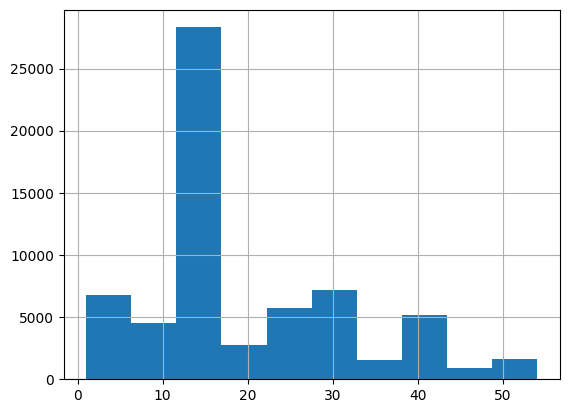

In [12]:
user_encounter_counts[user_encounter_counts <= user_encounter_counts.quantile(0.75)].hist()

<Axes: >

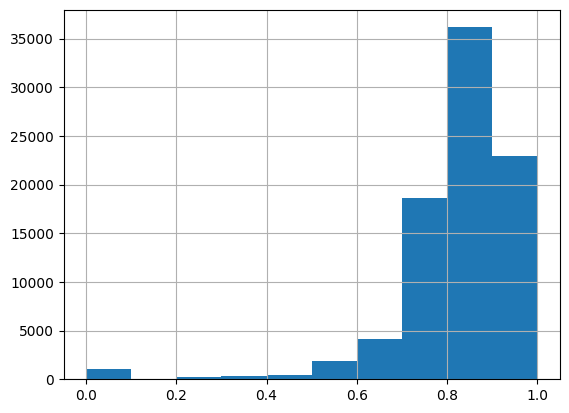

In [13]:
# Average percent correct for each user
user_pct_correct = df_fe.groupby('user_id')['correct_response'].mean()
user_pct_correct.hist()

It looks like we have a few addicted users who've played thousands of games , but most users have encountered fewer than 50 items.

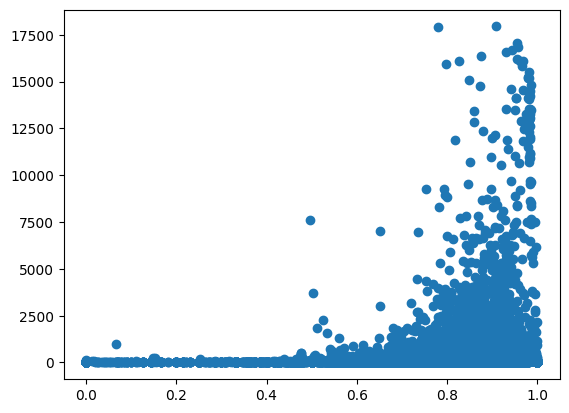

In [14]:
# Plot percent correct answers on X and number of first encounters on Y
plt.scatter(user_pct_correct, user_encounter_counts)

### Items

In [15]:
# First Encounters our items had
item_encounter_counts = df_fe.groupby('item_id')['user_id'].count()
item_encounter_counts.describe()

count    18081.000000
mean       461.953100
std        272.779626
min          1.000000
25%        273.000000
50%        368.000000
75%        651.000000
max       1727.000000
Name: user_id, dtype: float64

<Axes: >

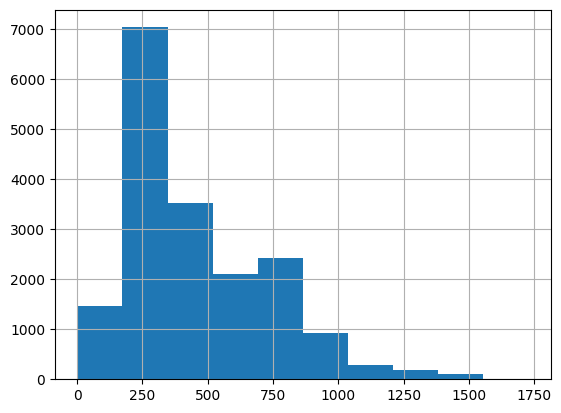

In [16]:
item_encounter_counts.hist()

In [17]:
item_pct_correct = df_fe.groupby('item_id')['correct_response'].mean()
item_pct_correct.describe()

count    18081.000000
mean         0.864093
std          0.092190
min          0.000000
25%          0.807087
50%          0.882038
75%          0.940030
max          1.000000
Name: correct_response, dtype: float64

<Axes: >

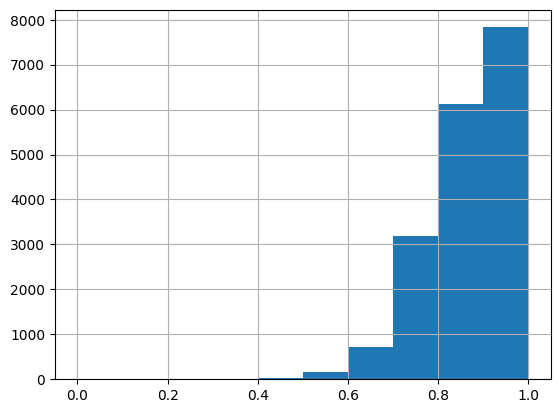

In [18]:
item_pct_correct.hist()

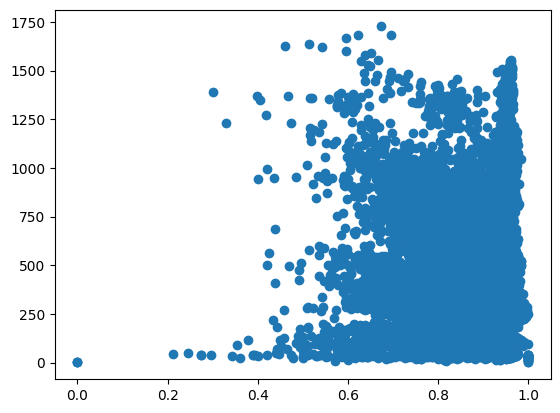

In [19]:
# Plot percent correct answers on X and number of first encounters on Y
plt.scatter(item_pct_correct, item_encounter_counts)

there are hardly any items that users get right less than 50% of the time. **This is due to the phenomenon of guessing.**

That query was run on the MySQL database dump, and this was the result:

In [20]:
# Get estimated item ratings
df_est_ratings = pd.read_csv('/content/drive/MyDrive/data/testitem_active_est_rating.csv', encoding='utf-8', index_col='id')
df_est_ratings.head()

,est_rating
id,
1,935
2,1045
3,1203
4,1552
5,1298


array([[<Axes: title={'center': 'est_rating'}>]], dtype=object)

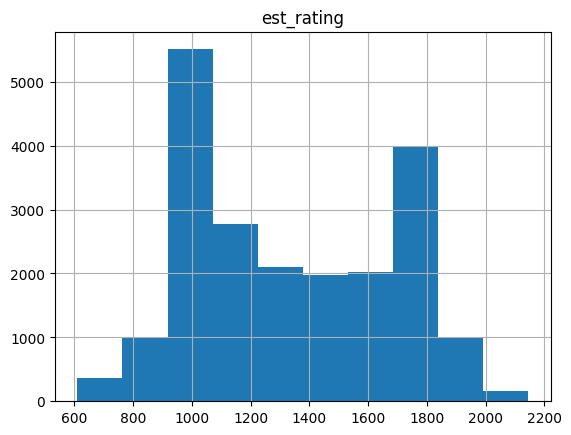

In [21]:
# distribution of ratings
df_est_ratings.hist()